In [254]:
def f(x, y):
    return x * y ** 2 - y


In [255]:
import numpy as np
import matplotlib.pyplot as plt

In [256]:
def range_kutt_fourth(a, b, y0, N):
    y = np.zeros(N)
    x = np.linspace(a, b, N)
    y[0] = y0
    h = x[1] - x[0]
    mul = np.array([h / 6, h / 3, h / 3, h / 6])
    for i in range(N - 1):
        K = np.zeros(4)
        K[0] = f(x[i], y[i])
        K[1] = f(x[i] + h/2, y[i] + h / 2 * K[0])
        K[2] = f(x[i] + h / 2, y[i] + h / 2 * K[1])
        K[3] = f(x[i + 1], y[i] + h * K[2])
        y[i + 1] = y[i] + mul @ K
 
    return x, y

In [257]:
def euler(a, b, y0, N):
    y = np.zeros(N)
    x = np.linspace(a, b, N)
    y[0] = y0
    h = x[1] - x[0]
    for i in range(N - 1):
        y[i + 1] = y[i] + h * f(x[i], y[i])
    return x, y
    

In [258]:
def euler_upgraded(a, b, y0, N):
    y = np.zeros(N)
    x = np.linspace(a, b, N)
    y[0] = y0
    h = x[1] - x[0]
    for i in range(N - 1):
        x_half = x[i] + h / 2
        y_half = y[i] + h / 2 * f(x[i], y[i])
        y[i + 1] = y[i] + h * f(x_half, y_half)
    return x, y
    

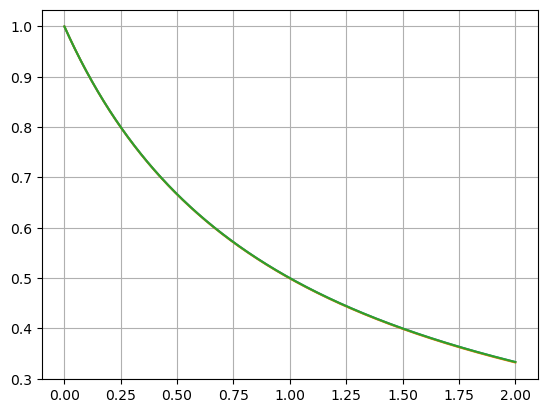

In [259]:
a = x0 = 0 
y0 = 1 
b = 2 
N = 1000 
x_rang, y_rang = range_kutt_fourth(a, b, y0, N)
x_euler, y_euler = euler(a, b, y0, N)
x_euler_up, y_euler_up = euler_upgraded(a, b, y0, N)
# print(x_rang, y_rang)
# print(x_euler, y_euler)
plt.plot(x_rang, y_rang )
plt.plot(x_euler, y_euler)
plt.plot(x_euler_up, y_euler_up)
plt.grid()
plt.show()